#### Capstone 3 - Housing Affordability and Debt in America - EDA

In [1]:
#import pandas, matplotlib, and numpy

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os

In [2]:
#load data csv file

df = pd.read_csv('Data/data_clean.csv')
df.head()

,Unnamed: 0,County,State,State Name,TotalDebt%,MedianDebtCollections,MedicalDebt%,StudentLoanDefault%,AutoRetailLoanDelinquency%,CreditCardDelinquency%,AverageHouseholdIncome,Average Zillow Home Estimate,Average Zillow Rent Estimate
0,0,Autauga County,AL,Alabama,0.300,1848,0.128,0.102,0.063,0.047,79498,231305,1480
1,1,Baldwin County,AL,Alabama,0.235,1986,0.097,0.095,0.043,0.030,87234,371580,1762
2,2,Calhoun County,AL,Alabama,0.394,1934,0.219,0.094,0.094,0.054,59140,156305,952
3,3,Chilton County,AL,Alabama,0.385,1932,0.227,0.100,0.092,0.049,68497,210295,1347
4,4,Coffee County,AL,Alabama,0.302,1931,0.143,0.100,0.054,0.037,74955,186170,1325


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1050 non-null   int64  
 1   County                        1050 non-null   object 
 2   State                         1050 non-null   object 
 3   State Name                    1050 non-null   object 
 4   TotalDebt%                    1050 non-null   float64
 5   MedianDebtCollections         1050 non-null   int64  
 6   MedicalDebt%                  1050 non-null   float64
 7   StudentLoanDefault%           1050 non-null   float64
 8   AutoRetailLoanDelinquency%    1050 non-null   float64
 9   CreditCardDelinquency%        1050 non-null   float64
 10  AverageHouseholdIncome        1050 non-null   int64  
 11  Average Zillow Home Estimate  1050 non-null   int64  
 12  Average Zillow Rent Estimate  1050 non-null   int64  
dtypes: 

In [4]:
# Checking for null values
df.isna().sum()

Unnamed: 0                      0
County                          0
State                           0
State Name                      0
TotalDebt%                      0
MedianDebtCollections           0
MedicalDebt%                    0
StudentLoanDefault%             0
AutoRetailLoanDelinquency%      0
CreditCardDelinquency%          0
AverageHouseholdIncome          0
Average Zillow Home Estimate    0
Average Zillow Rent Estimate    0
dtype: int64

In [5]:
df.describe().round(2)

,Unnamed: 0,TotalDebt%,MedianDebtCollections,MedicalDebt%,StudentLoanDefault%,AutoRetailLoanDelinquency%,CreditCardDelinquency%,AverageHouseholdIncome,Average Zillow Home Estimate,Average Zillow Rent Estimate
count,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00
mean,529.90,0.27,1737.02,0.14,0.08,0.04,0.04,90314.09,334202.24,1595.45
std,304.43,0.09,361.44,0.07,0.03,0.02,0.01,22565.31,191526.86,707.18
min,0.00,0.08,784.00,0.01,0.02,0.00,0.01,48904.00,81559.00,601.00
25%,268.25,0.20,1488.00,0.09,0.06,0.02,0.02,74726.50,214440.00,1181.25
50%,530.50,0.26,1706.50,0.14,0.08,0.03,0.03,84524.00,292930.50,1511.50
75%,792.75,0.33,1950.00,0.18,0.09,0.05,0.04,100593.00,396351.25,1877.75
max,1057.00,0.54,3475.00,0.44,0.19,0.11,0.12,200346.00,2187799.00,15105.00


In [6]:
#Drop 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

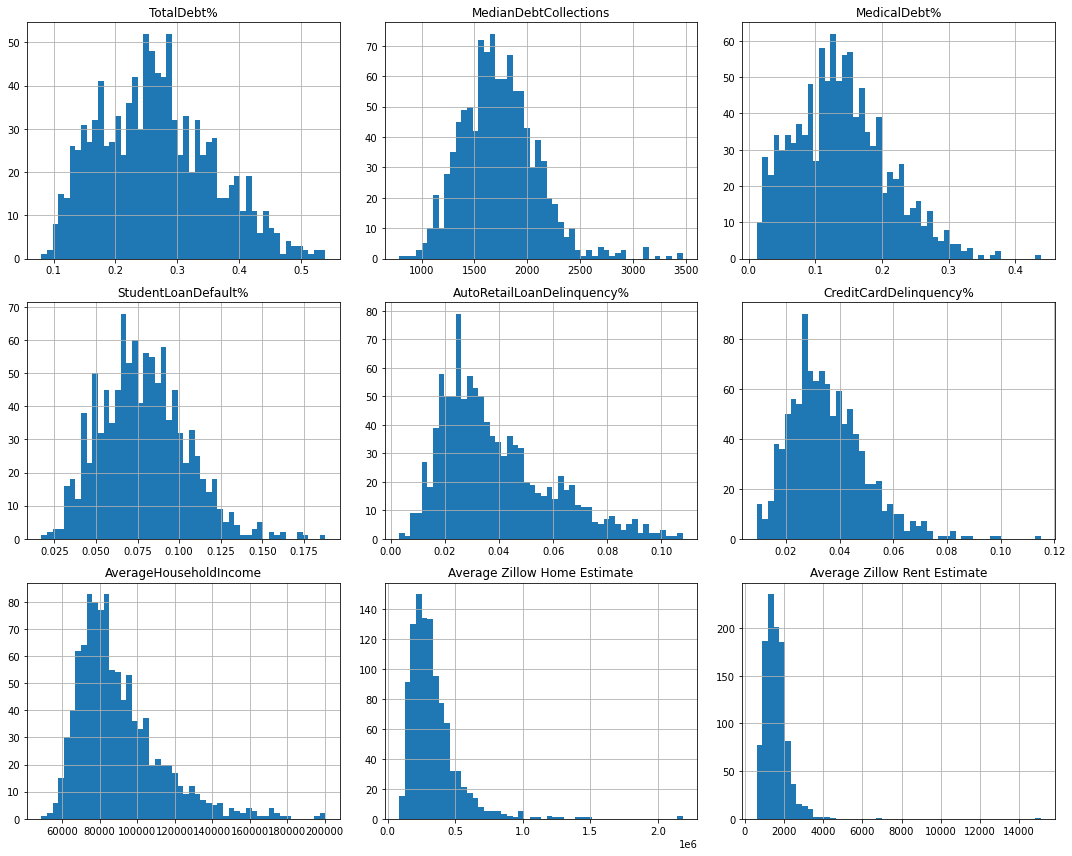

In [7]:
# Histograms for numeric columns

df.hist(figsize=(15, 12), bins=50)

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
#Let's sort by 'Zillow Home Estimate' to see what county is associated with the outlier and if it makes sense
df.sort_values('Average Zillow Home Estimate', ascending=False,).head()

,County,State,State Name,TotalDebt%,MedianDebtCollections,MedicalDebt%,StudentLoanDefault%,AutoRetailLoanDelinquency%,CreditCardDelinquency%,AverageHouseholdIncome,Average Zillow Home Estimate,Average Zillow Rent Estimate
116,Pitkin County,CO,Colorado,0.134,784,0.072,0.078,0.016,0.009,172472,2187799,15105
1049,Teton County,WY,Wyoming,0.141,1756,0.096,0.087,0.004,0.010,159027,2145785,6730
82,San Mateo County,CA,California,0.116,1911,0.043,0.053,0.020,0.015,200346,1485682,3422
84,Santa Clara County,CA,California,0.110,1745,0.036,0.055,0.023,0.016,197524,1430104,3370
66,Marin County,CA,California,0.107,1747,0.045,0.042,0.016,0.011,194703,1413365,3853


#### Note on data: Zillow Home Estimate is for the mid-value homes (35th - 65th percentile)
The outliers, Pitkin County, CO (Aspen) and Teton County, WY (Jackson Hole) are where billionaires vacation. The next three counties are all in California's Bay Area with some of the most expensive real estate in the country. So the home estimates seem accurate. 

In [9]:
# Let's check Zillow Rent Estimate as well
df.sort_values('Average Zillow Rent Estimate', ascending=False,).head()

,County,State,State Name,TotalDebt%,MedianDebtCollections,MedicalDebt%,StudentLoanDefault%,AutoRetailLoanDelinquency%,CreditCardDelinquency%,AverageHouseholdIncome,Average Zillow Home Estimate,Average Zillow Rent Estimate
116,Pitkin County,CO,Colorado,0.134,784,0.072,0.078,0.016,0.009,172472,2187799,15105
1049,Teton County,WY,Wyoming,0.141,1756,0.096,0.087,0.004,0.010,159027,2145785,6730
104,Eagle County,CO,Colorado,0.145,1276,0.092,0.049,0.018,0.009,128398,1204370,4412
156,Monroe County,FL,Florida,0.267,1598,0.152,0.120,0.020,0.031,115417,987255,4094
574,New York County,NY,New York,0.151,1426,0.029,0.061,0.044,0.028,157046,1200470,4089


The outliers for rent estimates are all affluent counties -- Pitkin County, CO (Aspen), Teton County, WY (Jackson Hole), Eagle County, CO (Vail), Monroe County, FL (Key Largo, Florida Keys), New York County, NY (New York City). So these outliers seem accurate as well.

<AxesSubplot:>

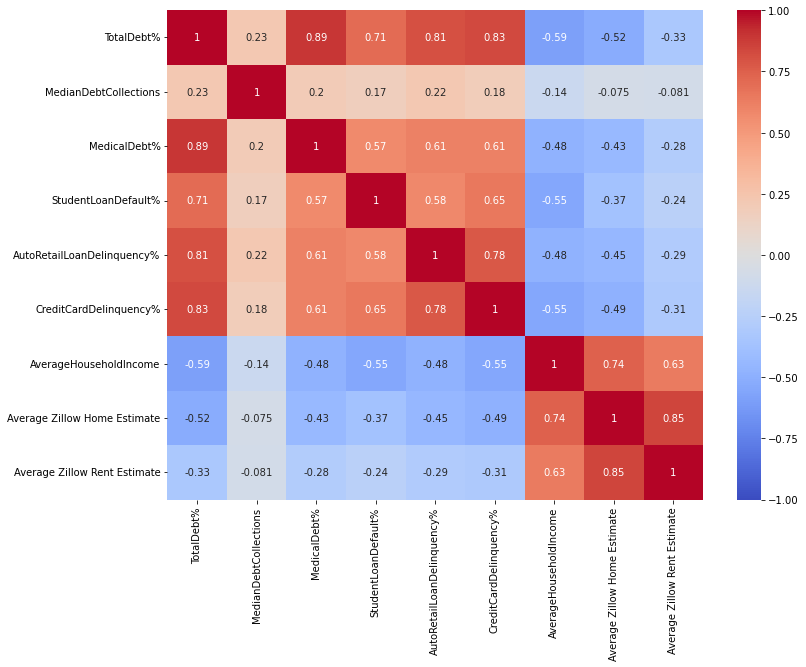

In [10]:
# Let's see how the columns are correlated with a heatmap

plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


#### Income and debt variables are inversely correlated as are Zillow estimates and debt columns.

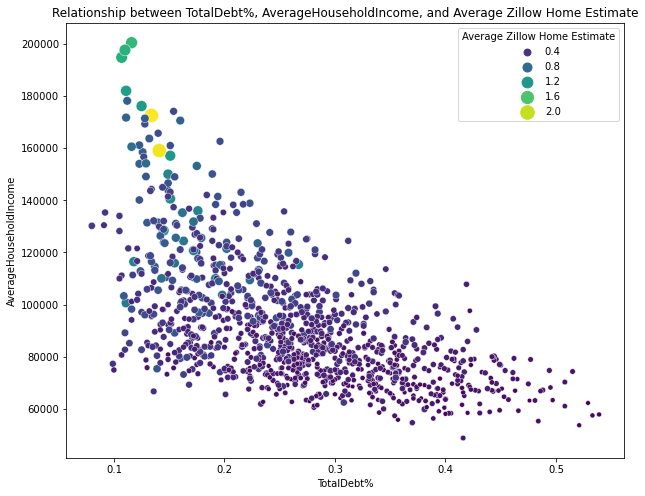

In [11]:
# Using TotalDebt% and AverageHouseholdIncome on the axes, and coloring by Average Zillow Home Estimate
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalDebt%', y='AverageHouseholdIncome', hue='Average Zillow Home Estimate', data=df, palette='viridis', size='Average Zillow Home Estimate', sizes=(20, 200))
plt.title('Relationship between TotalDebt%, AverageHouseholdIncome, and Average Zillow Home Estimate')
plt.show()


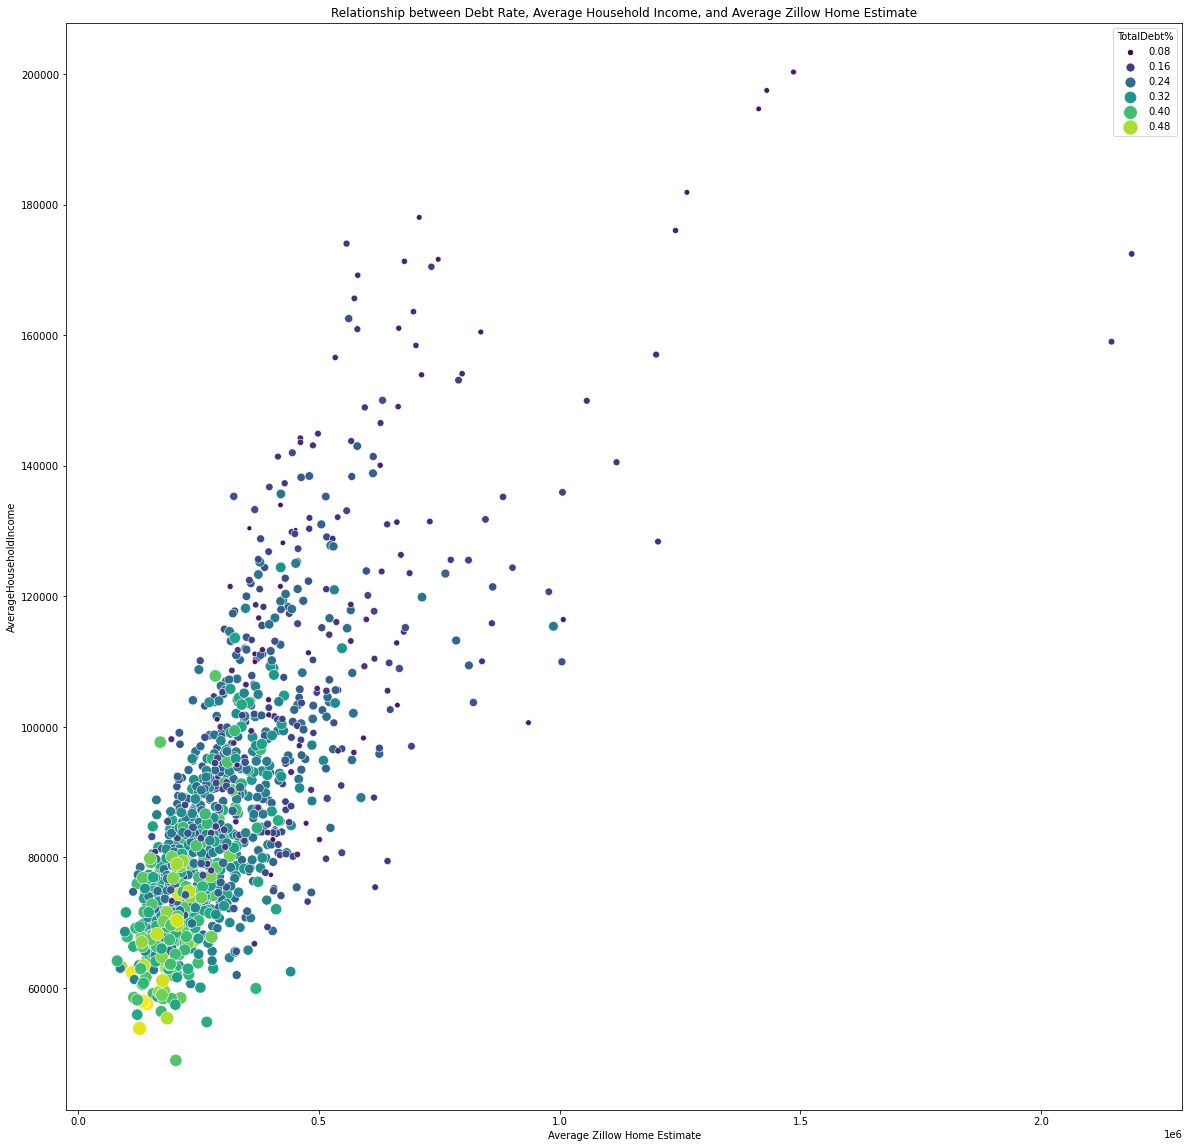

In [12]:
# Using Average Zillow Home Estimate and AverageHouseholdIncome on the axes, and coloring by TotalDebt% 
plt.figure(figsize=(20, 20))
sns.scatterplot(x='Average Zillow Home Estimate', y='AverageHouseholdIncome', hue='TotalDebt%', 
                data=df, palette='viridis', size='TotalDebt%', sizes=(20, 200))
plt.title('Relationship between Debt Rate, Average Household Income, and Average Zillow Home Estimate')
plt.show()

#### As average income goes up in each location, so do home values. Those communities with the highest rates of debt have lowest home values and avearge incomes.